In [1]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import face_recognition
import PIL.Image
import PIL.ImageDraw
import cv2,sys,time,math
import numpy as np
import matplotlib.pyplot as plt
import dlib

In [3]:
input_image = face_recognition.load_image_file(r"C:\Users\User\Downloads\girl.jpeg")
face_landmarks = face_recognition.face_landmarks(input_image)
print(face_landmarks[0])

{'chin': [(309, 180), (312, 197), (317, 213), (323, 229), (330, 245), (340, 257), (355, 266), (373, 270), (393, 269), (413, 262), (430, 253), (444, 241), (453, 225), (456, 207), (456, 187), (454, 167), (452, 148)], 'left_eyebrow': [(312, 160), (316, 147), (327, 139), (341, 136), (354, 138)], 'right_eyebrow': [(372, 132), (385, 123), (400, 118), (415, 120), (427, 129)], 'nose_bridge': [(367, 153), (368, 165), (370, 176), (372, 188)], 'nose_tip': [(362, 202), (369, 203), (376, 203), (384, 199), (391, 195)], 'left_eye': [(327, 170), (334, 163), (343, 160), (354, 164), (345, 168), (335, 170)], 'right_eye': [(387, 154), (395, 146), (405, 144), (415, 146), (407, 151), (397, 153)], 'top_lip': [(354, 226), (363, 218), (372, 212), (380, 212), (387, 208), (399, 208), (413, 211), (408, 212), (389, 216), (381, 219), (373, 220), (358, 225)], 'bottom_lip': [(413, 211), (403, 217), (393, 223), (385, 225), (377, 227), (366, 228), (354, 226), (358, 225), (375, 219), (383, 217), (390, 215), (408, 212)]}

In [5]:
output_image = PIL.Image.fromarray(input_image)
draw = PIL.ImageDraw.Draw(output_image)

In [7]:
landmark = face_landmarks[0].get('left_eye')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

landmark = face_landmarks[0].get('chin')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

landmark = face_landmarks[0].get('right_eye')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

landmark = face_landmarks[0].get('left_eyebrow')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

landmark = face_landmarks[0].get('right_eyebrow')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

landmark = face_landmarks[0].get('nose_bridge')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

landmark = face_landmarks[0].get('nose_tip')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

landmark = face_landmarks[0].get('top_lip')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

landmark = face_landmarks[0].get('bottom_lip')
for loc in landmark:
    x,y = loc
    draw.rectangle((x, y, x+2, y+2), outline = 'red',  width=5)

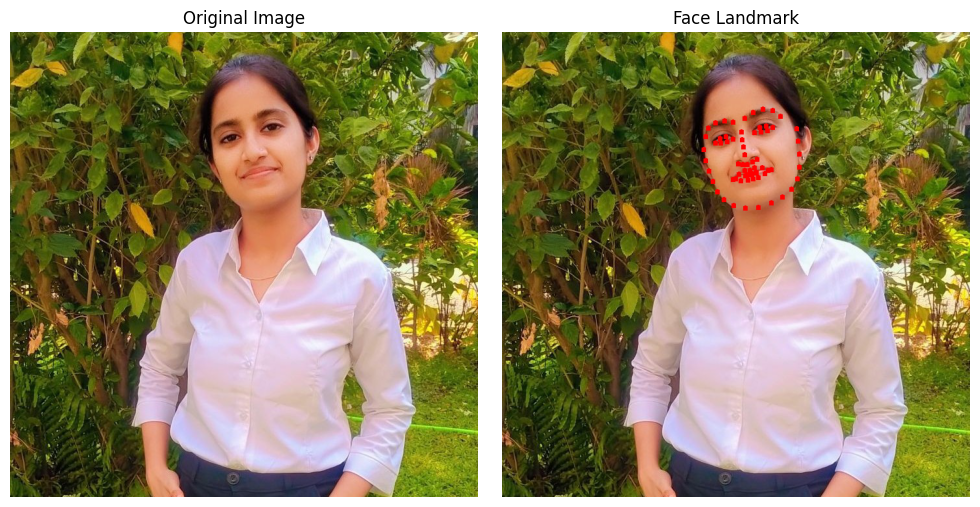

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))  # (Width, Height) of full figure

# Original Image
plt.subplot(1, 2, 1)        # (Rows=1, Columns=2, Plot 1)
plt.imshow(input_image)
plt.title('Original Image')
plt.axis('off')             # Hide axis ticks

# Landmark Output Image
plt.subplot(1, 2, 2)        # (Rows=1, Columns=2, Plot 2)
plt.imshow(output_image)
plt.title('Face Landmark')
plt.axis('off')

plt.tight_layout()          # Adjust layout nicely
plt.show()


In [11]:
lipy1 = face_landmarks[0]
lipy2 = face_landmarks[0]
lipx1 = face_landmarks[0] 
lipx2 = face_landmarks[0]

In [13]:
eyey1 = face_landmarks[0]
eyey2 = face_landmarks[0]
eyex1 = face_landmarks[0]
eyex2 = face_landmarks[0]

In [15]:
def applyLipstick(img, landmarks, lipColor, isRealistic=False):
    # Get lip landmarks
    poly_top = np.array(landmarks.get('top_lip'), np.int32).reshape((-1, 1, 2))
    poly_bottom = np.array(landmarks.get('bottom_lip'), np.int32).reshape((-1, 1, 2))
    
    # Create a mask
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, [poly_top, poly_bottom], (255, 255, 255))

    if isRealistic:
        # Smooth the mask slightly to avoid sharp edges
        mask = cv2.GaussianBlur(mask, (5, 5), 0)
        
        # Create a lipstick color image
        lipstick_img = np.zeros_like(img)
        lipstick_img[:] = lipColor
        
        # Blend lipstick color on original image using the mask
        output = cv2.addWeighted(img, 0, lipstick_img, 1, 0)
        final_img = np.where(mask > 10, output, img)
        return final_img.astype('uint8'), final_img.astype('uint8')
    
    else:
        # Simple direct fill (no realistic blending)
        output = img.copy()
        cv2.fillPoly(output, [poly_top, poly_bottom], lipColor)
        return output, output

(-0.5, 719.5, 715.5, -0.5)

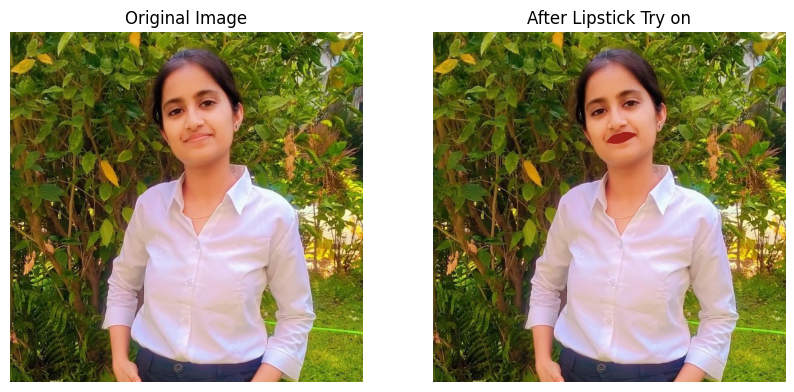

In [19]:
# Load image
im = cv2.imread(r"C:\Users\User\Downloads\girl.jpeg")
imRGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Detect landmarks
face_landmarks = face_recognition.face_landmarks(imRGB)

# Apply lipstick
rgbColor = (159, 31, 25)  # Example lipstick color
lipstick_img, _ = applyLipstick(imRGB, face_landmarks[0], rgbColor, isRealistic=True)

# # Show
# plt.imshow(output_img)
# plt.axis('off')
# plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(imRGB)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("After Lipstick Try on")
plt.imshow(lipstick_img)
plt.axis('off')

In [21]:
def applyEyeLiners(img, landmarks, rgbColor = (0,0,0), thickness = 1, isRealistic = True):
    landmark = face_landmarks[0].get('left_eye')
    landmark = face_landmarks[0].get('right_eye')
    
    poly1 = np.array(face_landmarks[0].get('right_eye'), np.int32).reshape((-1, 1, 2))
    poly2 = np.array(face_landmarks[0].get('left_eye'), np.int32).reshape((-1, 1, 2))
    
    return cv2.polylines(img.copy(), [poly1, poly2],
                        isClosed = False,
                        color = rgbColor,
                        thickness = thickness)

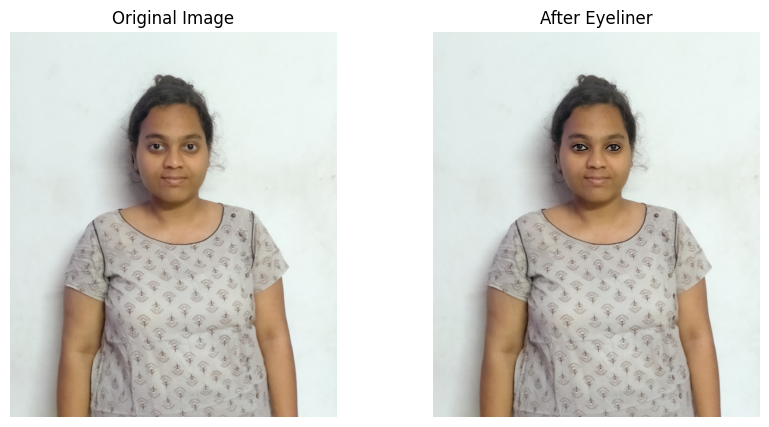

In [23]:
# Read the image
im = cv2.imread(r"C:\Users\User\Downloads\TK_92.jpg")
imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Apply eyeliner (only eyeliner, no lipstick touch)
eyeliner_img = applyEyeLiners(imDlib, face_landmarks, rgbColor=(0,0,0), thickness=3)

# Now plot properly
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(imDlib)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("After Eyeliner")
plt.imshow(eyeliner_img)
plt.axis('off')

plt.show()

In [53]:
def applyMakeup(image, face_landmarks, eyeliner_thickness=2, lipstick_color=(147,43,43), is_realistic=False):
    img_with_eyeliner = applyEyeLiners(image, face_landmarks, thickness=eyeliner_thickness)
    img_with_makeup, diff = applyLipstick(img_with_eyeliner, face_landmarks[0], lipColor=lipstick_color, isRealistic=is_realistic)
    return img_with_makeup

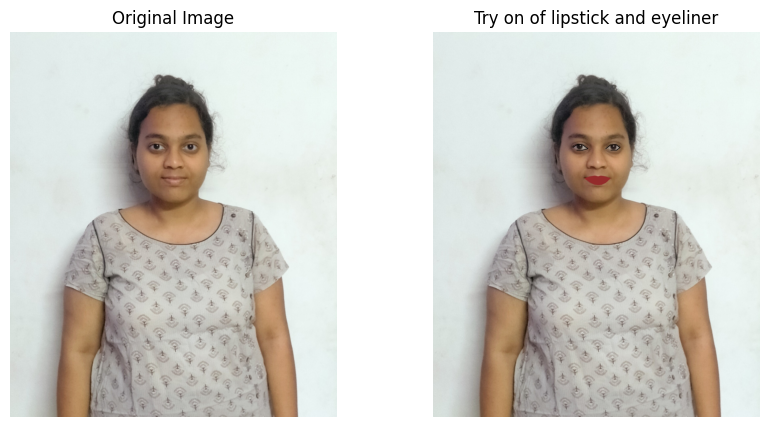

In [61]:
result_image = applyMakeup(imDlib, face_landmarks, eyeliner_thickness=2, lipstick_color=(147,43,43), is_realistic=False)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(imDlib)
plt.axis('off')

# plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title("Try on of lipstick and eyeliner")
plt.imshow(result_image)
plt.axis('off')
plt.show()